## 📊 Air Quality Dataset Description

This dataset includes daily air pollution measurements across different cities. Each row represents a reading for various pollutants along with the overall Air Quality Index (AQI).

| **Column Name** | **Description** |
|-----------------|-----------------|
| `Date`          | Date of the air quality reading. |
| `City`          | City where the reading was recorded. |
| `CO`            | Carbon Monoxide (CO) concentration in **µg/m³**. |
| `CO2`           | Carbon Dioxide (CO₂) concentration in **ppm**. |
| `NO2`           | Nitrogen Dioxide (NO₂) concentration in **µg/m³**. |
| `SO2`           | Sulphur Dioxide (SO₂) concentration in **µg/m³**. |
| `O3`            | Ozone (O₃) concentration in **µg/m³**. |
| `PM2.5`         | Particulate Matter 2.5 concentration in **µg/m³**. |
| `PM10`          | Particulate Matter 10 concentration in **µg/m³**. |
| `AQI`           | European Air Quality Index (AQI), indicating overall air quality. |


Importing Dependicies

In [32]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 

#### Data Cleaning and Importing

In [33]:
# Importing the dataset into pandas dataframe
air_data = pd.read_csv("C:/Users/USER/Desktop/Datasets/Air_Quality.csv")
air_data.head()

,Date,City,CO,CO2,NO2,SO2,O3,PM2.5,PM10,AQI
0,2024-01-01 00:00:00+00:00,Brasilia,323.0,NaN,23.8,2.8,42.0,12.0,17.1,16.800000
1,2024-01-01 01:00:00+00:00,Brasilia,318.0,NaN,21.9,2.7,40.0,12.5,17.9,16.000000
2,2024-01-01 02:00:00+00:00,Brasilia,309.0,NaN,19.2,2.6,39.0,12.1,17.3,15.599999
3,2024-01-01 03:00:00+00:00,Brasilia,295.0,NaN,16.3,2.4,38.0,11.4,16.2,15.200000
4,2024-01-01 04:00:00+00:00,Brasilia,270.0,NaN,13.0,2.1,40.0,10.2,14.6,16.000000


In [34]:
# Check the number of rows and columns
air_data.shape

(52704, 10)

In [35]:
# Check general info about the dataset
air_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52704 entries, 0 to 52703
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    52704 non-null  object 
 1   City    52704 non-null  object 
 2   CO      52704 non-null  float64
 3   CO2     9648 non-null   float64
 4   NO2     52704 non-null  float64
 5   SO2     52704 non-null  float64
 6   O3      52704 non-null  float64
 7   PM2.5   52704 non-null  float64
 8   PM10    52704 non-null  float64
 9   AQI     52704 non-null  float64
dtypes: float64(8), object(2)
memory usage: 4.0+ MB


In [36]:
# Number of missing values
air_data.isna().sum()

Date         0
City         0
CO           0
CO2      43056
NO2          0
SO2          0
O3           0
PM2.5        0
PM10         0
AQI          0
dtype: int64

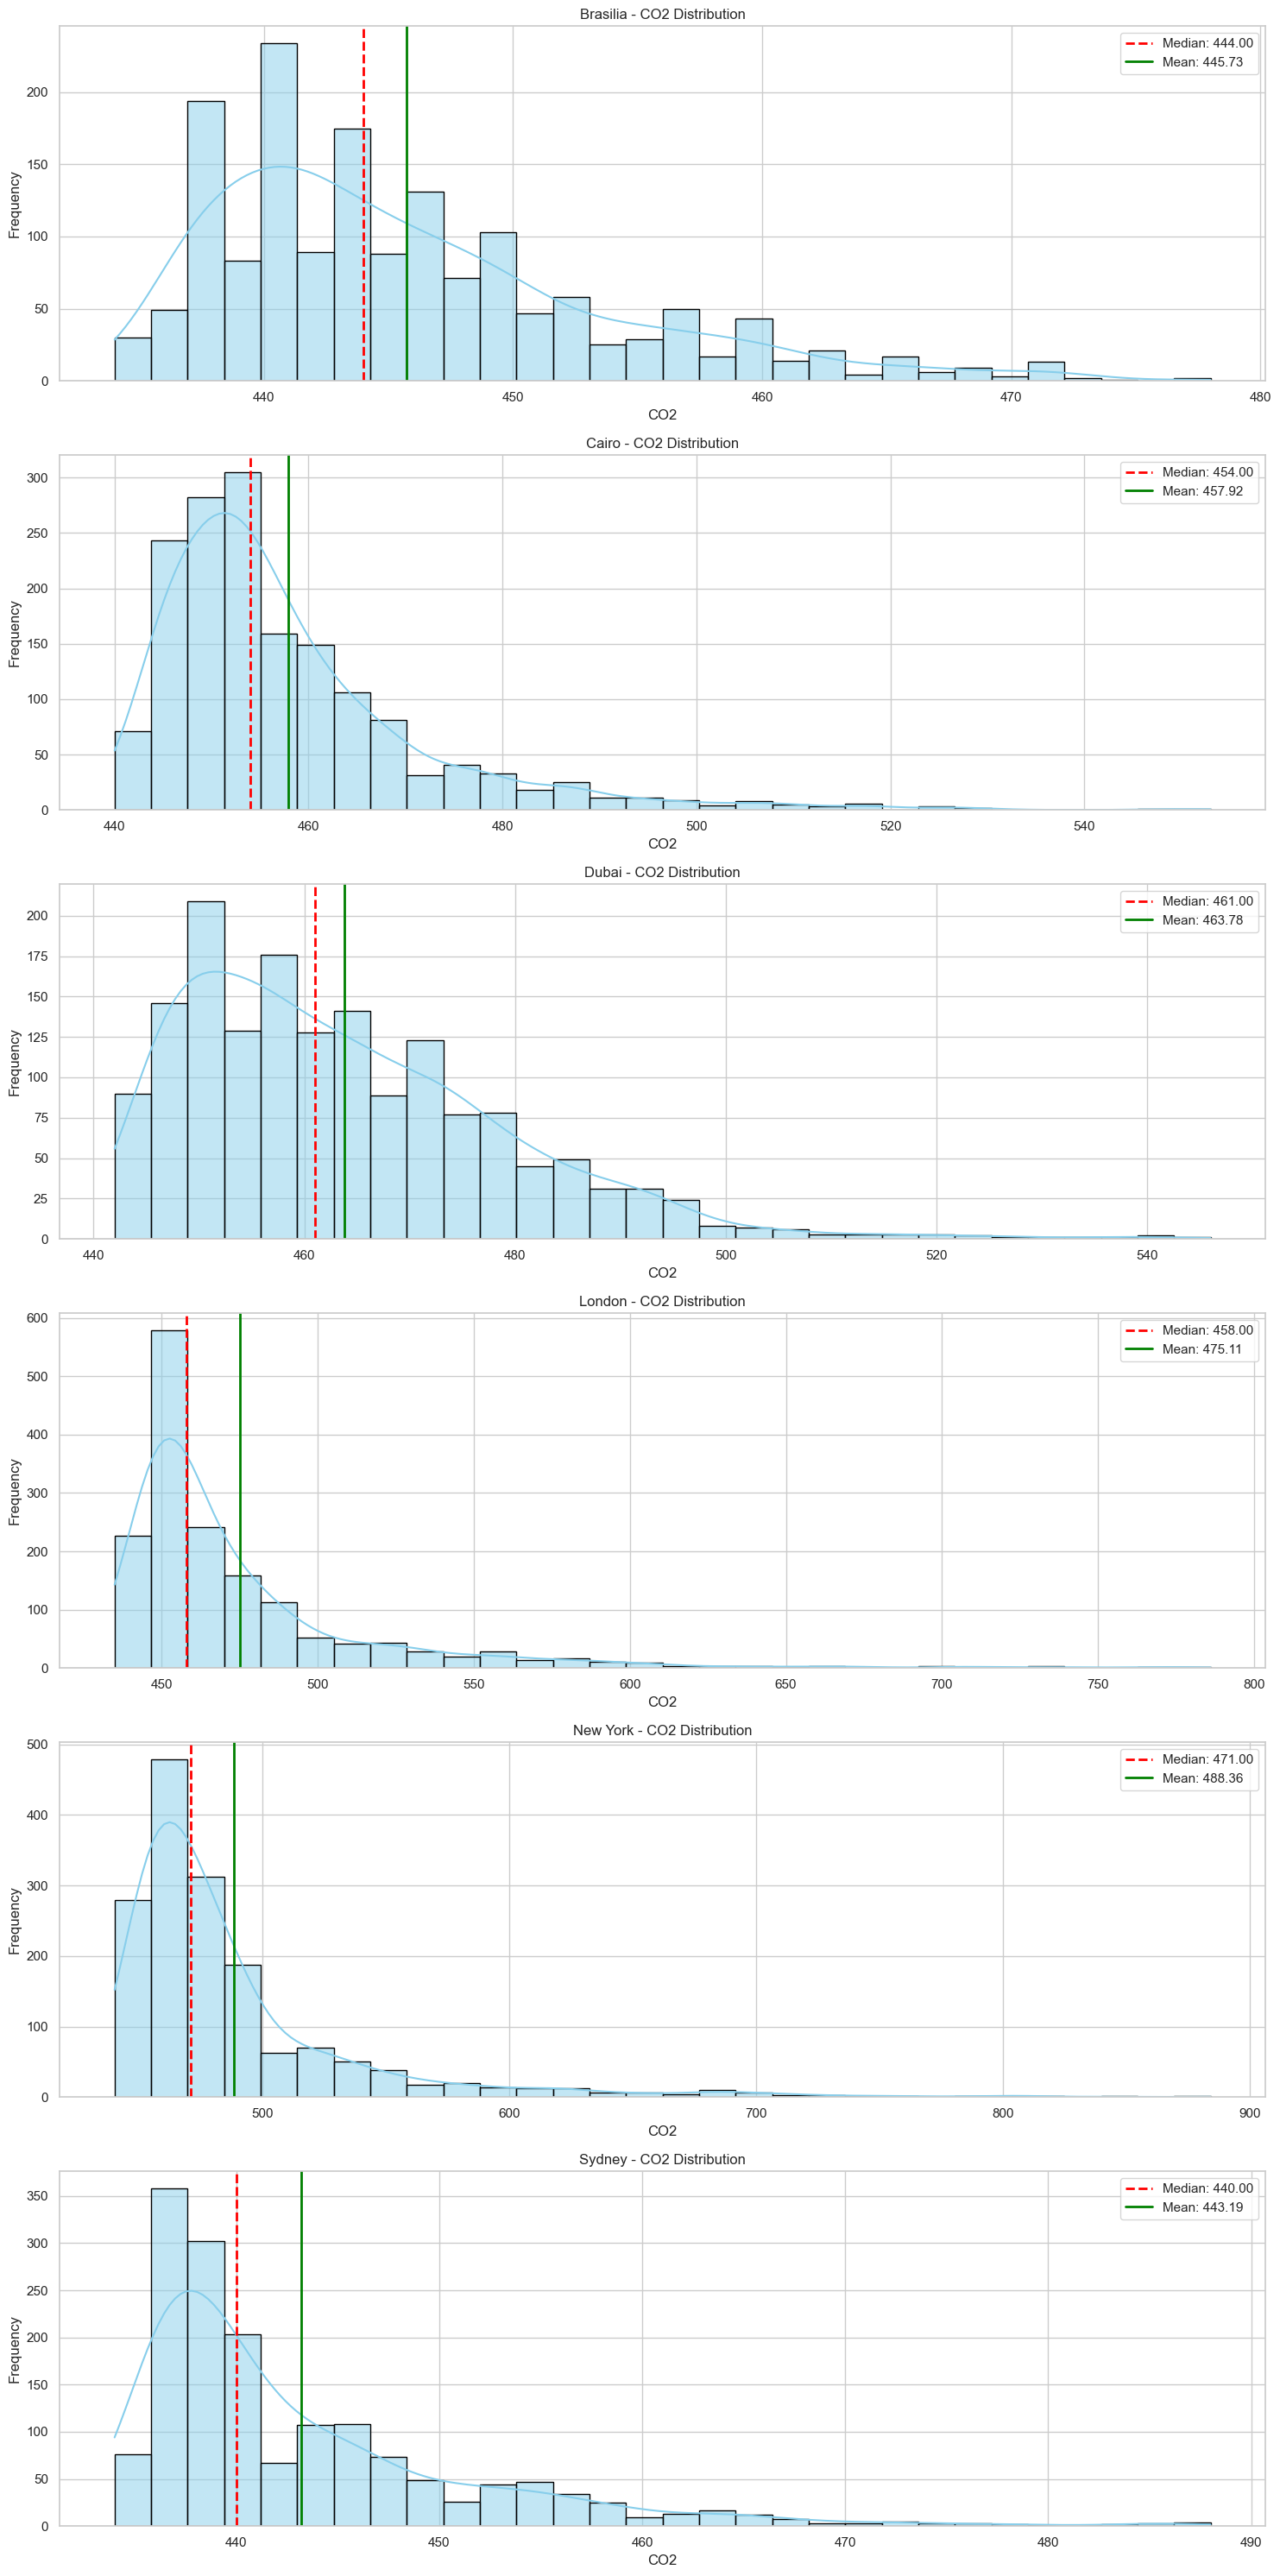

In [37]:
# Checking the distribution of available CO2 values
# Get unique cities
cities = air_data['City'].unique()

# Set plot style
sns.set(style='whitegrid')
plt.figure(figsize=(15, 5 * len(cities)))

# Loop through each city
for i, city in enumerate(cities, 1):
    city_data = air_data[air_data['City'] == city]['CO2'].dropna()
    
    plt.subplot(len(cities), 1, i)
    sns.histplot(city_data, bins=30, kde=True, color='skyblue', edgecolor='black')
    
    # Median and mean
    median = city_data.median()
    mean = city_data.mean()
    
    plt.axvline(median, color='red', linestyle='--', linewidth=2, label=f'Median: {median:.2f}')
    plt.axvline(mean, color='green', linestyle='-', linewidth=2, label=f'Mean: {mean:.2f}')
    
    plt.title(f'{city} - CO2 Distribution')
    plt.xlabel('CO2')
    plt.ylabel('Frequency')
    plt.legend()

plt.tight_layout()
plt.show()


In [38]:
# Filling missing values with each city's median
# Group by 'City' and compute median CO2 values
city_medians = air_data.groupby('City')['CO2'].median()

# Define a function to fill missing CO2 with city-specific median
def fill_co2(row):
    if pd.isna(row['CO2']):
        return city_medians.get(row['City'], air_data['CO2'].median())
    return row['CO2']

# Apply the function
air_data['CO2'] = air_data.apply(fill_co2, axis=1)

In [39]:
air_data.isna().sum()

Date     0
City     0
CO       0
CO2      0
NO2      0
SO2      0
O3       0
PM2.5    0
PM10     0
AQI      0
dtype: int64

In [40]:
# Change the date column to datetime datatype 
air_data['Date'] = pd.to_datetime(air_data['Date'])
# rename the Date column to Datetime
air_data.rename(columns={'Date': 'Datetime'}, inplace=True)

air_data.dtypes

Datetime    datetime64[ns, UTC]
City                     object
CO                      float64
CO2                     float64
NO2                     float64
SO2                     float64
O3                      float64
PM2.5                   float64
PM10                    float64
AQI                     float64
dtype: object

In [45]:
# Round the columns to 2 decimal place 
cols_to_round = ['CO2', 'NO2', 'SO2', 'O3', 'PM2.5', 'PM10', 'AQI']
air_data[cols_to_round] = air_data[cols_to_round].round(2)
air_data

,Datetime,City,CO,CO2,NO2,SO2,O3,PM2.5,PM10,AQI
0,2024-01-01 00:00:00+00:00,Brasilia,323.0,444.0,23.8,2.8,42.0,12.0,17.1,16.80
1,2024-01-01 01:00:00+00:00,Brasilia,318.0,444.0,21.9,2.7,40.0,12.5,17.9,16.00
2,2024-01-01 02:00:00+00:00,Brasilia,309.0,444.0,19.2,2.6,39.0,12.1,17.3,15.60
3,2024-01-01 03:00:00+00:00,Brasilia,295.0,444.0,16.3,2.4,38.0,11.4,16.2,15.20
4,2024-01-01 04:00:00+00:00,Brasilia,270.0,444.0,13.0,2.1,40.0,10.2,14.6,16.00
...,...,...,...,...,...,...,...,...,...,...
52699,2024-12-31 19:00:00+00:00,Sydney,106.0,448.0,15.5,6.4,26.0,9.7,13.0,19.20
52700,2024-12-31 20:00:00+00:00,Sydney,112.0,449.0,15.7,8.3,29.0,11.1,13.6,19.18
52701,2024-12-31 21:00:00+00:00,Sydney,115.0,449.0,14.7,9.8,36.0,11.5,15.1,19.27
52702,2024-12-31 22:00:00+00:00,Sydney,113.0,447.0,11.8,10.7,53.0,11.6,15.7,21.20


#### Exploratory Data Analysis

Basic statistical summary

In [44]:
# Basic statistical summary
air_data.describe()

,CO,CO2,NO2,SO2,O3,PM2.5,PM10,AQI
count,52704.000000,52704.000000,52704.000000,52704.000000,52704.000000,52704.000000,52704.000000,52704.000000
mean,258.258121,456.072860,24.102998,12.569869,60.025729,17.689931,35.643143,41.349344
std,159.589953,17.484255,19.363443,17.266623,38.217348,15.670075,48.444774,26.626149
min,52.000000,434.000000,0.000000,0.000000,0.000000,0.100000,0.100000,4.450000
25%,159.000000,444.000000,9.700000,2.300000,35.000000,6.900000,10.200000,22.800000
50%,213.000000,454.000000,18.900000,5.700000,54.000000,12.500000,18.900000,31.275000
75%,306.000000,461.000000,33.400000,16.800000,78.000000,23.000000,37.500000,57.702500
max,2045.000000,884.000000,165.900000,239.700000,349.000000,129.500000,543.900000,196.630000


 City-wise summaries

In [48]:
# City-wise summaries
air_data.groupby("City").mean(numeric_only=True)

,CO,CO2,NO2,SO2,O3,PM2.5,PM10,AQI
City,,,,,,,,
Brasilia,221.450478,444.316029,8.735633,1.619854,57.757286,6.549283,8.886726,24.749360
Cairo,293.819217,454.717668,32.617634,38.294319,61.102459,23.736054,43.422222,52.489789
Dubai,440.464026,461.508652,39.488297,20.308971,93.878415,41.574146,111.040619,85.113719
London,187.744194,461.132969,21.797495,3.326093,49.154030,9.985178,14.136009,27.097207
New York,283.640027,474.177709,27.804360,6.252550,52.121926,13.359745,18.948406,32.878248
Sydney,122.430783,440.584130,14.174567,5.617429,46.140255,10.935178,17.424875,25.767739


Correlation

<Axes: >

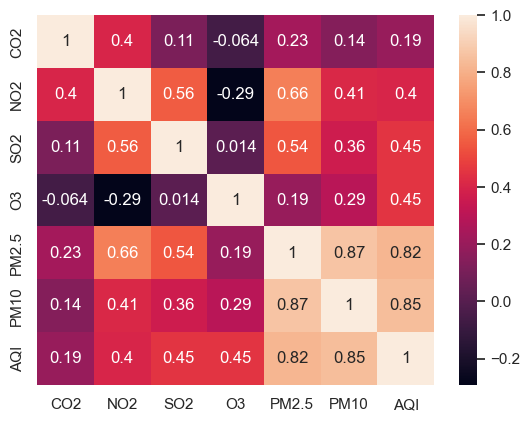

In [46]:
# Correlation of features 
sns.heatmap(air_data[['CO2', 'NO2', 'SO2', 'O3', 'PM2.5', 'PM10', 'AQI']].corr(), annot=True)


Mean Pollutant Levels per City

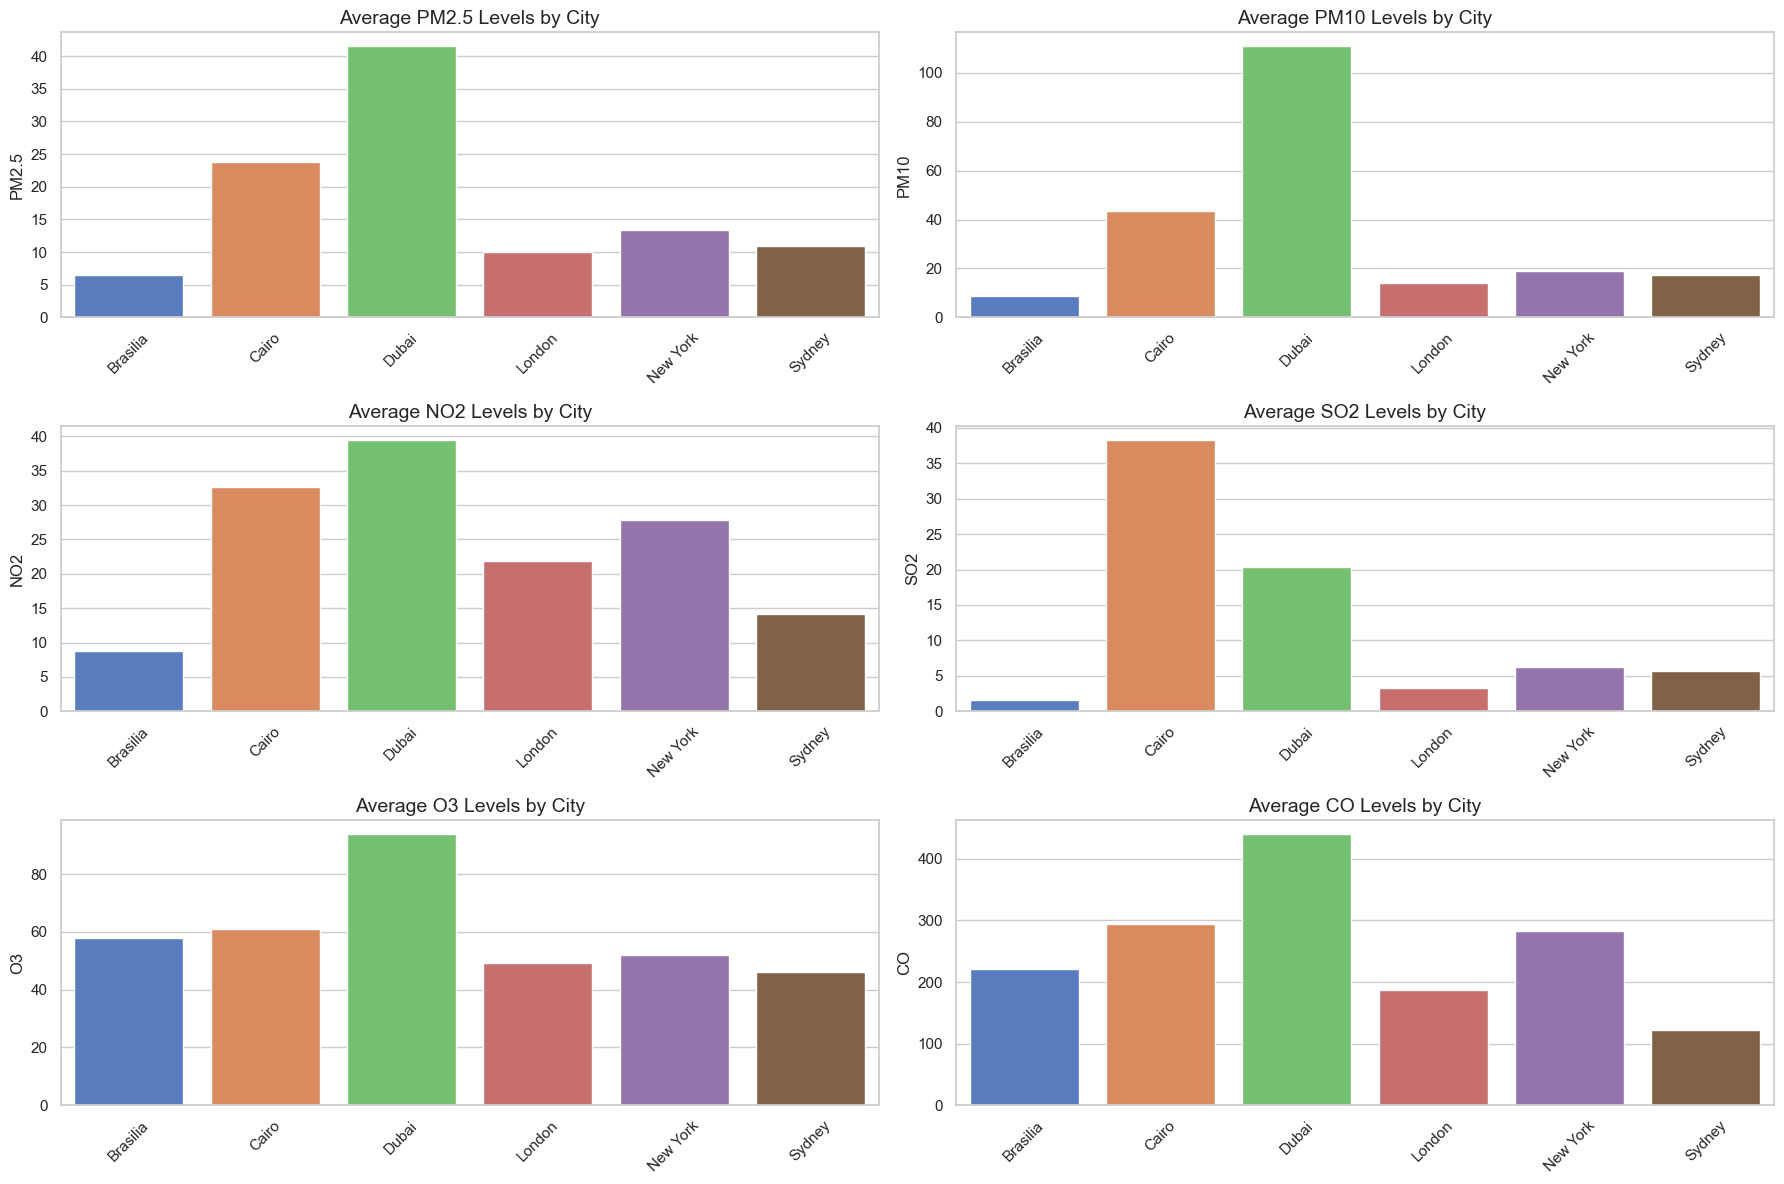

In [57]:
# Compute mean pollutant levels per city
pollutants = ['PM2.5', 'PM10', 'NO2', 'SO2', 'O3', 'CO']
city_means = air_data.groupby('City')[pollutants].mean().reset_index()

# Set seaborn style
sns.set(style="whitegrid")

# Create 3x2 subplot
fig, axes = plt.subplots(3, 2, figsize=(18, 12))
axes = axes.flatten()

# Create one plot per pollutant
for i, pollutant in enumerate(pollutants):
    sns.barplot(
        data=city_means,
        x='City',
        y=pollutant,
        hue='City',               # explicitly specify hue
        palette='muted',
        ax=axes[i],
        legend=False              # suppress legend
    )
    axes[i].set_title(f'Average {pollutant} Levels by City', fontsize=14)
    axes[i].set_xlabel('')
    axes[i].set_ylabel(pollutant)
    axes[i].tick_params(axis='x', rotation=45)

# Adjust layout
plt.tight_layout()
plt.show()

Daily Average Air Quality Index Trend per City

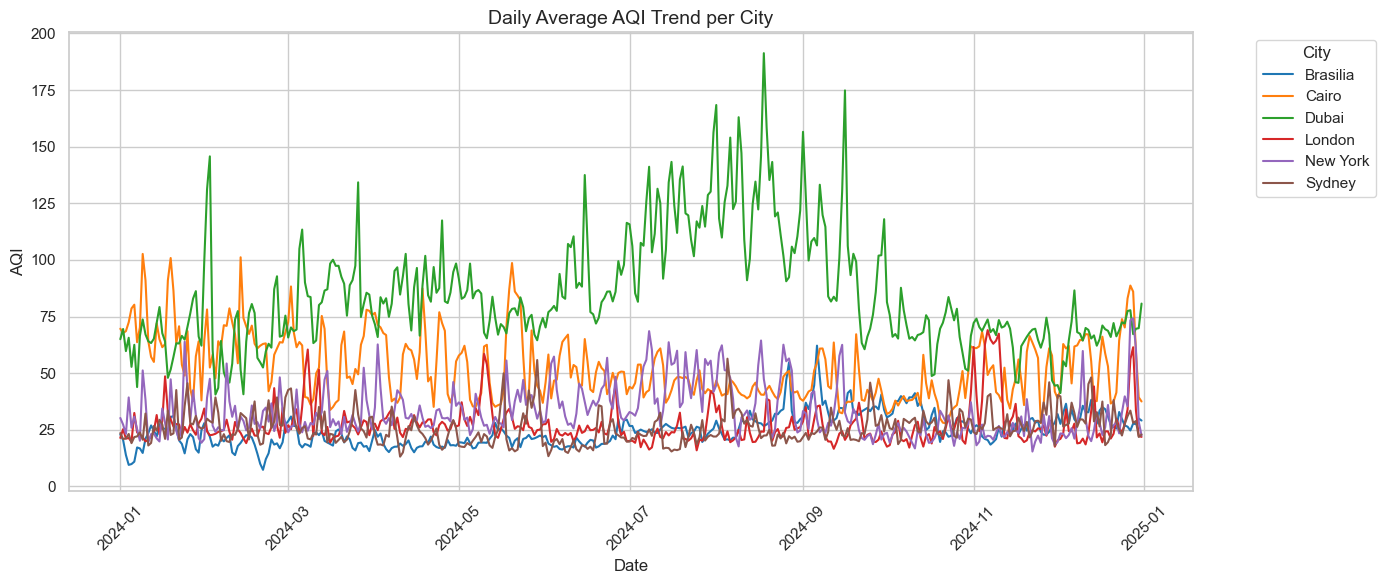

In [68]:
# Group by date and city, then compute daily average AQI
daily_city_aqi = air_data.groupby([air_data['Datetime'].dt.date, 'City'])['AQI'].mean().reset_index()
daily_city_aqi['Datetime'] = pd.to_datetime(daily_city_aqi['Datetime'])
plt.figure(figsize=(14, 6))
sns.lineplot(data=daily_city_aqi, x='Datetime', y='AQI', hue='City', palette='tab10')
plt.title('Daily Average AQI Trend per City', fontsize=14)
plt.xlabel('Date')
plt.ylabel('AQI')
plt.xticks(rotation=45)
plt.legend(title='City', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

Compare Pollution Levels on Weekdays vs. Weekends

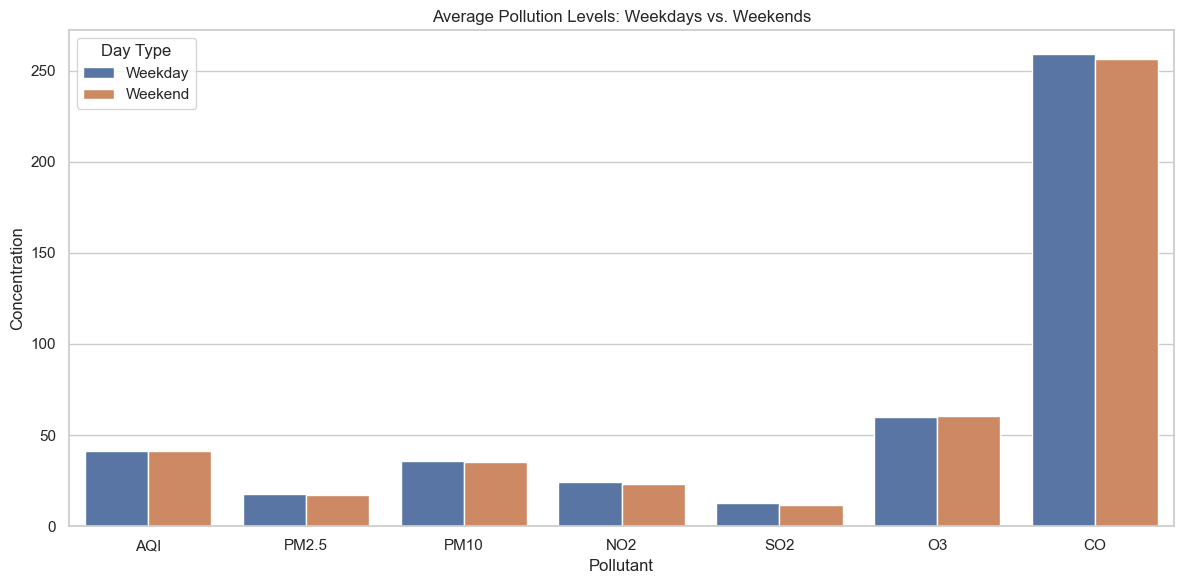

In [69]:
# Add a 'DayType' column (Weekday or Weekend)
air_data['DayType'] = air_data['Datetime'].dt.dayofweek.apply(lambda x: 'Weekend' if x >= 5 else 'Weekday')

# Group by DayType and calculate average levels
daytype_means = air_data.groupby('DayType')[['AQI', 'PM2.5', 'PM10', 'NO2', 'SO2', 'O3', 'CO']].mean().reset_index()

# Melt for plotting
daytype_melted = daytype_means.melt(id_vars='DayType', var_name='Pollutant', value_name='Average Level')
plt.figure(figsize=(12, 6))
sns.barplot(data=daytype_melted, x='Pollutant', y='Average Level', hue='DayType')
plt.title('Average Pollution Levels: Weekdays vs. Weekends')
plt.ylabel('Concentration')
plt.xlabel('Pollutant')
plt.legend(title='Day Type')
plt.tight_layout()
plt.show()